In [ ]:
pip install langchain openai
pip install langchain-openai
pip install langchain-community #required for accessing open source models using ollama or for reading text for pdf files
pip install langchain-embeddings-openai #required for embedding models
pip install langchain-chroma #required for vector database
pip install pypdf #required for reading pdf files

## What is streamlit?

Streamlit is a open source python framework used to create ui for python applications in simple and quick steps

**How to install streamlit?**

pip install streamlit

**To run streamlit application :** streamlit run first-agent.py

### Output

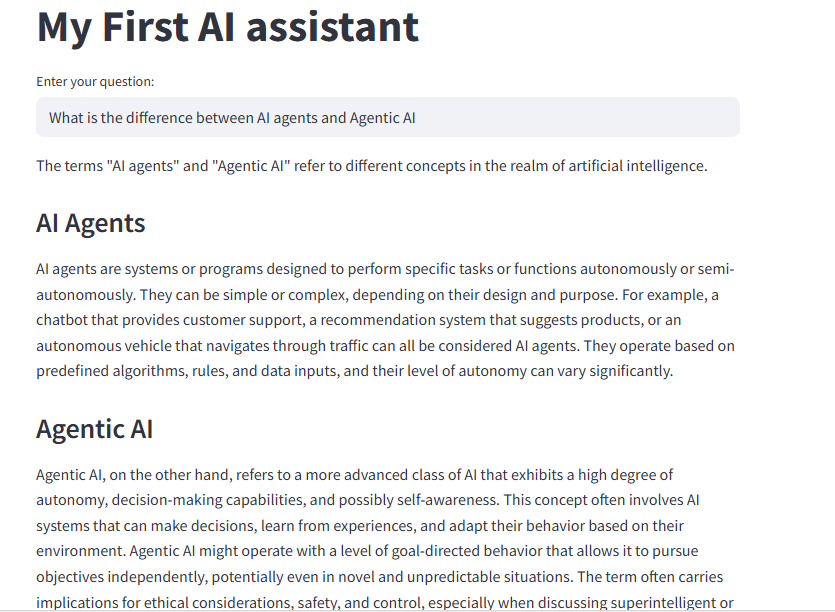

## Use prompt template

Refer agent-using-prompt-template.py
Input is replaced prompt template and the same is invoked using llm

### Output
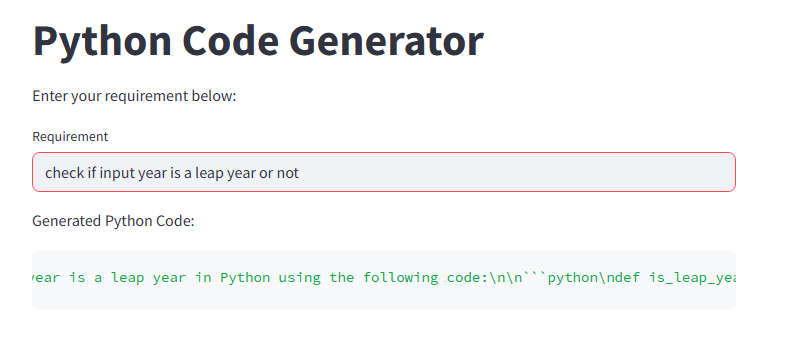

Write a blog post on a {topic} given by user, in a particular mood, targetting a {audience}. The length of the blog post must be {noOfSentence}. First chain will generate the title and second chain will generate the content.

The same can be converted to Regular Sequencial chain where topic and audience are input of first chaning while the title from first chain and no of sentence will be the input of second chain

#Search using embedding

**Vector Store** : Chroma 

### To install Chroma
* pip install langchain chromadb
* pip install langchain_chroma

Here a text file is kept in an input folder which is split and uploaded in Chroma (Vector store) and then searched using embedding score of stored data and the input


# Chat with AI

By default, agent does not have any memory and neither do LLM retains the context. So if we design a chatbot, it will respond correctly but it cannot remember the first interaction. 

To help it retain, we are introducing chat with history

Changes required for this involves:
* MessagesPlaceholder(variable_name = "chat_history") - This is added to the template to ensure that the previous history is passed on to LLM
* To pass the history into the chain, history_for_chain = ChatMessageHistory()
* Finally history is added to the chain using lambda expression and two new keys are added
final_chain_with_history = RunnableWithMessageHistory(
    chain,
    lambda session_id: history_for_chain,
    input_messages_key = "question",
    history_messages_key = "chat_history"
)
* Also while invoking the chain, I have to pass a dictionary called configuration
{"configurable": {"session_id": "test123"}}


The RunnableWithMessageHistory method is used to create a chain that can maintain a conversation history. I creates 
a list of request and response using method ChatMessageHistory(). The input_messages_key and history_messages_key are 
used to specify the keys for the input and history messages respectively. 

The history is then injected into the MessagesPlaceholder in the prompt template which is passed on to LLM along with 
the new user input for LLM to have the context.